# MNIST - Softmax model 

In [126]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # tensor flow
from keras.utils.np_utils import to_categorical # one hot encoding

In [127]:
# configuration parameter
TRAINING_ITERATIONS = 100000
BATCH_SIZE = 128

In [128]:
epochs_completed = 0
index_in_epoch = 0
num_examples = y_train.shape[0]

def next_batch(batch_size, i):
    global x_train
    global y_train
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reorder randomly
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        x_train = x_train[perm]
        y_train = y_train[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[start:end], y_train[start:end]

In [129]:
# read training data from CSV file
dataset = pd.read_csv("./data/train.csv")
x_train = dataset.iloc[:,1:].values.astype('float32')
y_train = dataset.iloc[:,0].values.astype('float32')
y_train = to_categorical(y_train)
y_train = y_train.astype(np.uint8)
x_ = tf.placeholder(tf.float32, [None, 784])

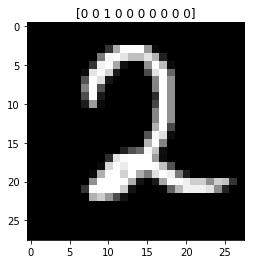

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

test = x_train[2,:].reshape(28,28)
plt.imshow(test, cmap=plt.get_cmap('gray'))
plt.title(y_train[2]);

In [131]:
# define the model
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x_, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

In [132]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [133]:
# loss func
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

In [134]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [135]:
# init
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [136]:
# train
display_step = 1
for i in range(TRAINING_ITERATIONS):
    batch_xs, batch_ys = next_batch(BATCH_SIZE, i)
    sess.run(train_step, feed_dict={x_: batch_xs, y_: batch_ys})
    # check progress on every 1st,2nd,...,10th,20th,...,100th... step
    if i % display_step == 0 or (i + 1) == TRAINING_ITERATIONS:
        train_accuracy = sess.run(accuracy, feed_dict={x_: batch_xs, y_: batch_ys})
        print('training_accuracy => %.4f for step %d' % (train_accuracy, i))
        
        # increase display_step
        if i % (display_step * 10) == 0 and i:
            display_step *= 10

training_accuracy => 0.5156 for step 0
training_accuracy => 0.1328 for step 1
training_accuracy => 0.1406 for step 2
training_accuracy => 0.0781 for step 3
training_accuracy => 0.0859 for step 4
training_accuracy => 0.1016 for step 5
training_accuracy => 0.1172 for step 6
training_accuracy => 0.0781 for step 7
training_accuracy => 0.0703 for step 8
training_accuracy => 0.0781 for step 9
training_accuracy => 0.0938 for step 10
training_accuracy => 0.1016 for step 20
training_accuracy => 0.1094 for step 30
training_accuracy => 0.0625 for step 40
training_accuracy => 0.1016 for step 50
training_accuracy => 0.0938 for step 60
training_accuracy => 0.1016 for step 70
training_accuracy => 0.0703 for step 80
training_accuracy => 0.1797 for step 90
training_accuracy => 0.0938 for step 100
training_accuracy => 0.0703 for step 200
training_accuracy => 0.1016 for step 300
training_accuracy => 0.1094 for step 400
training_accuracy => 0.1406 for step 500
training_accuracy => 0.0781 for step 600
trai

In [ ]:
# read testing data from CSV file
x_test = pd.read_csv("./data/test.csv").values.astype('float32')